<a href="https://colab.research.google.com/github/BrianMoringa/Week7.Core.Module-II.IP/blob/main/Week7_Core_Module_II_IP_Brian_Onchweri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HASS CONSULTING COMPANY.REAL ESTATE HOUSING PRICES OUTLOOK USING REGRESSION TECHNIQUES**

In [186]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [187]:
# Loading the Dataset
df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [188]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540182.159,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367362.232,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [190]:
df.shape

(21613, 20)

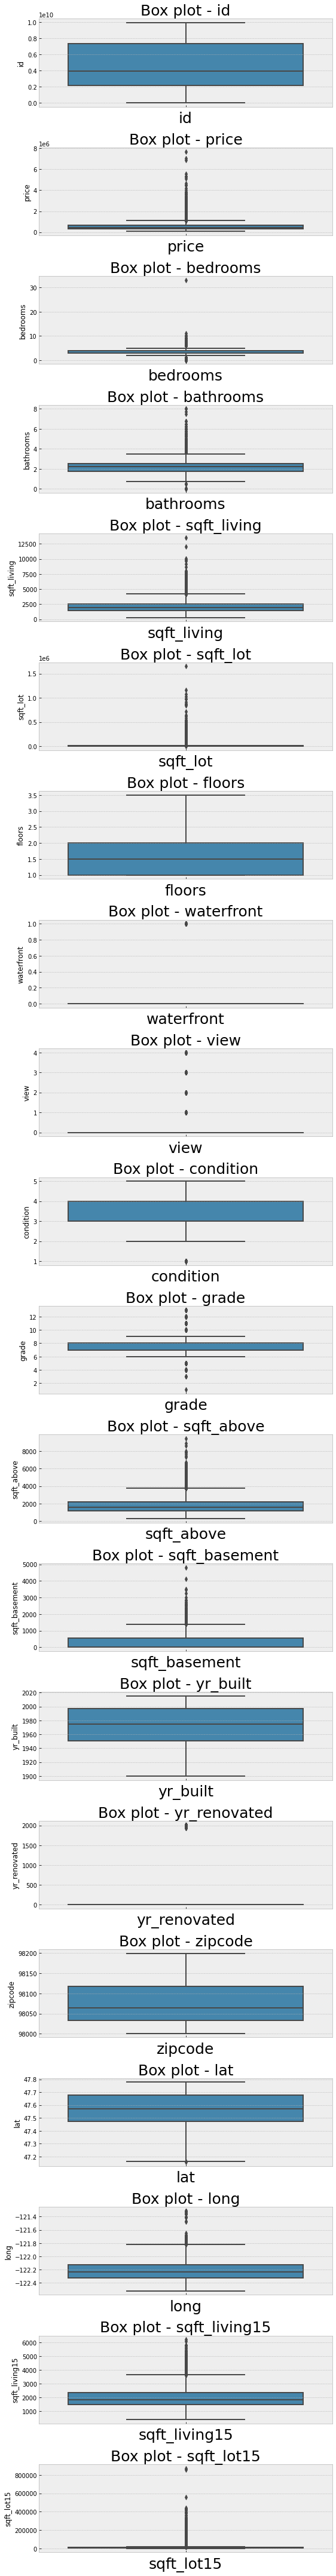

In [191]:
#checking for outliers in the dataset
col_names = numeric_clmns = df.dtypes[df.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=25)
    ax[i].set_xlabel(col_val, fontsize=25)

plt.tight_layout()
plt.show()

In [192]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [193]:
# replace spaces in the data set column names
df.rename(columns=lambda x: x.strip().replace(" ", ""), inplace=True)
# confirm changes
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650


In [194]:
#create a copy of the data
df1=df.copy()

Text(0.5, 1.0, 'Bar graph of grade')

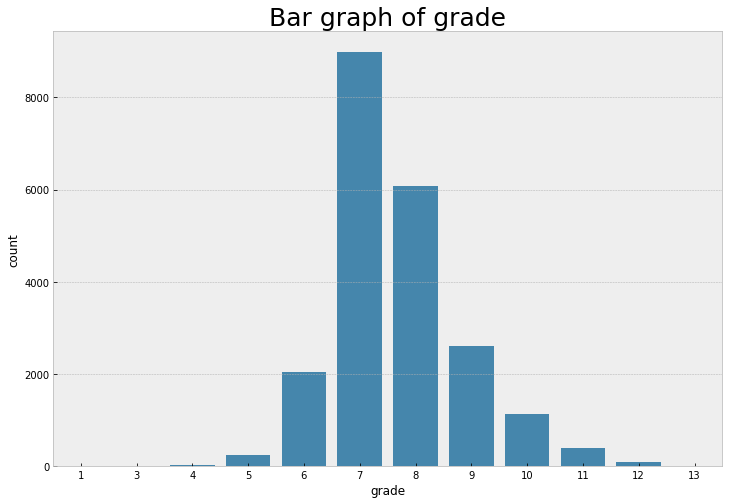

In [195]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x = 'grade', color = base_color)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['grade'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of grade',fontsize=25)

Text(0.5, 1.0, 'Bar graph of floors')

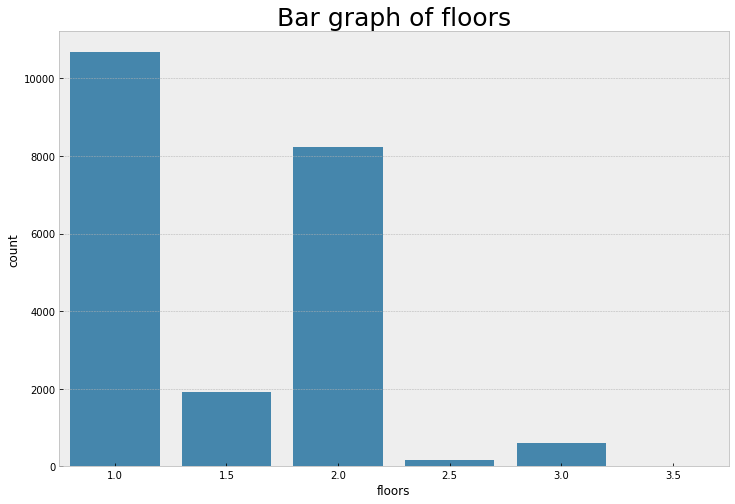

In [196]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = df1, x = 'floors', color = base_color)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['floors'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of floors',fontsize=25)

Text(0.5, 1.0, 'Bar graph of bedrooms')

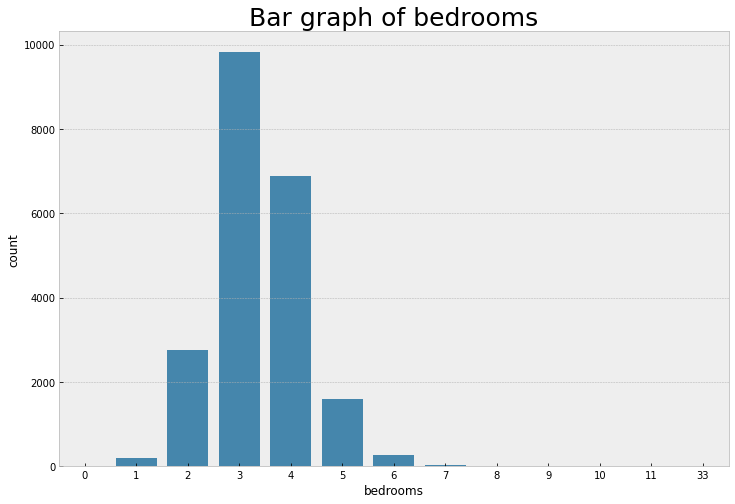

In [197]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x = 'bedrooms', color = base_color)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['bedrooms'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of bedrooms',fontsize=25)

Text(0.5, 1.0, 'Bar graph of bathrooms')

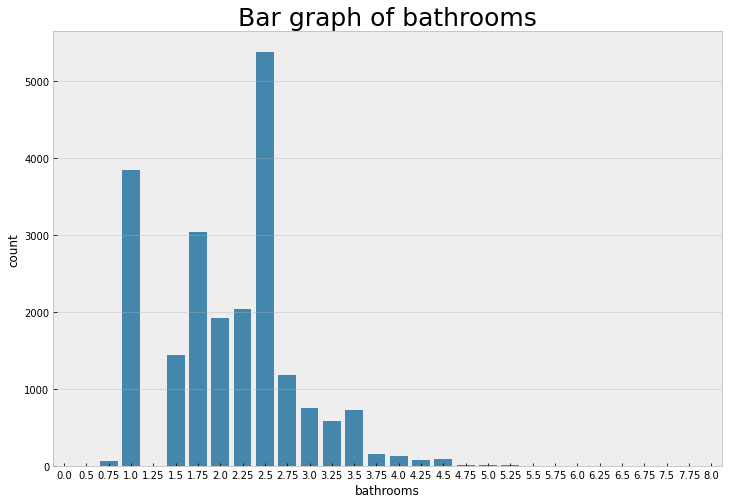

In [198]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = df1, x = 'bathrooms', color = base_color)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['bathrooms'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of bathrooms',fontsize=25)

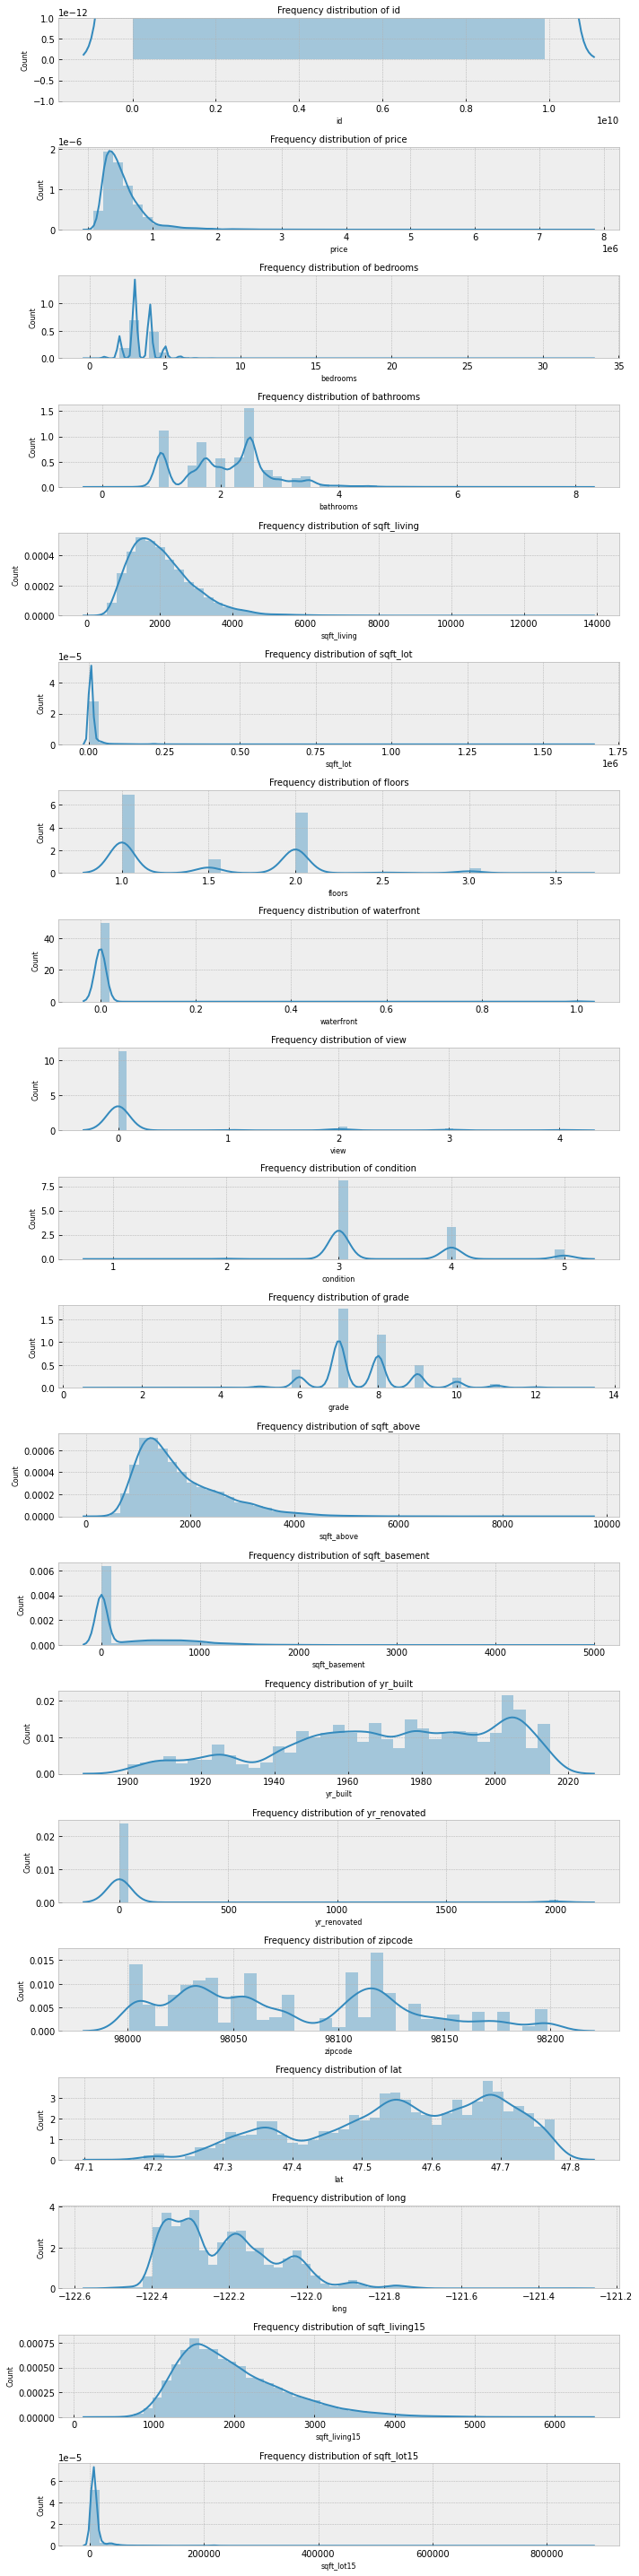

In [199]:
# Plotting distribution of numerical variables
col_names = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

<function matplotlib.pyplot.show>

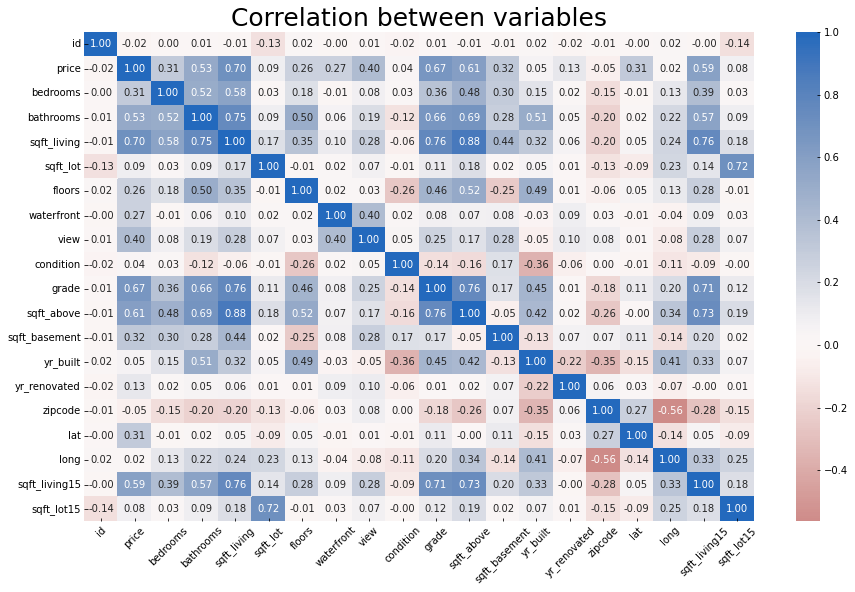

In [200]:
plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
#correlation_matrix=teams_data.corr(method = 'spearman')
#sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables',fontsize=25)
plt.show

In [201]:
# correlations between the variables
correlations = df.corr()
correlations

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,0.008,-0.011,-0.005,0.021,-0.017,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082
bedrooms,0.001,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,0.154,0.019,-0.153,-0.009,0.129,0.392,0.029
bathrooms,0.005,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,-0.204,0.025,0.223,0.569,0.087
sqft_living,-0.012,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719
floors,0.019,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073
condition,-0.024,0.036,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003


In [202]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.029,0.034,0.002,-0.005,-0.000,0.077,-0.012,0.003,-0.038,0.022,-0.048,0.019,-0.007,0.024,0.018,0.000,0.007,-0.073,0.009,0.106
price,0.034,3.332,0.302,-0.288,1.128,-0.046,-0.033,-0.457,-0.369,-0.155,-1.025,-2.367,-1.145,0.699,-0.072,0.283,-0.757,0.272,-0.134,0.098
bedrooms,0.002,0.302,1.679,-0.487,0.064,0.045,0.047,0.022,0.081,-0.065,0.214,-1.052,-0.561,0.198,0.039,0.106,-0.018,0.042,0.013,0.094
bathrooms,-0.005,-0.288,-0.487,3.376,-0.161,-0.020,-0.672,0.049,-0.010,-0.124,-0.179,-1.015,-0.943,-0.996,-0.254,0.017,0.024,0.031,0.104,0.063
sqft_living,-0.000,1.053,0.048,-0.181,-143967589604372.094,-0.250,1.931,-0.167,-0.079,0.013,0.271,129805045059526.328,69374591569478.227,-0.085,-0.152,-0.372,-0.326,0.286,-0.215,0.468
sqft_lot,0.077,-0.046,0.045,-0.020,-0.250,2.109,0.045,0.034,-0.057,0.034,-0.043,0.049,0.087,0.090,0.024,-0.007,0.065,-0.143,0.167,-1.453
floors,-0.012,-0.033,0.047,-0.672,1.940,0.045,2.012,-0.001,-0.037,0.091,-0.220,-2.233,-0.312,-0.489,-0.080,-0.174,-0.120,0.162,0.274,0.071
waterfront,0.003,-0.457,0.022,0.049,-0.176,0.034,-0.001,1.267,-0.442,0.009,0.190,0.232,0.163,-0.117,-0.055,-0.016,0.114,-0.010,0.073,-0.031
view,-0.038,-0.369,0.081,-0.010,-0.077,-0.057,-0.037,-0.442,1.477,-0.005,-0.071,0.261,-0.151,0.074,-0.033,-0.172,0.202,0.044,-0.311,-0.022
condition,0.022,-0.155,-0.065,-0.124,0.011,0.034,0.091,0.009,-0.005,1.257,-0.008,0.108,-0.075,0.529,0.210,0.148,0.099,-0.021,0.082,-0.030


###**Performing Heteroskadasticity Test**

In [203]:
#df1 columns
df1.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [204]:
#New DataFrame with new specified columns
NewDf=df1[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
NewDf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


##**Linear Regression. This will form the control of our experiment as we are going to compare subsequent results with this model**

In [205]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = NewDf.drop(['price'],axis=1)
y = NewDf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4323.000
mean,4544.492
std,190490.832
min,-3207547.940
25%,-72297.053
50%,11992.832
75%,101264.349
max,1033708.169


In [206]:
residuals.mean()

4544.491901155197

###**Visualizing Residuals**

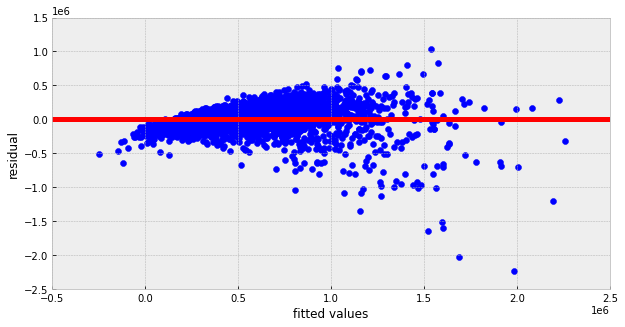

In [207]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.scatter(y_predict, residuals, color='blue')
plt.ylim(-2500000, 1500000)
plt.xlim(-500000, 2500000)
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

In [208]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

1.094774654353197e-189
The variances are homogeneous!


##**Linear Regression**

In [209]:
#data for model 2
X = NewDf.drop(['price'],axis=1)
y = NewDf[['price']]
X.shape,y.shape

((21613, 19), (21613, 1))

In [210]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [211]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lreg= LinearRegression()  
lreg.fit(X,y) 

LinearRegression()

In [212]:
from pandas import Series, DataFrame
print('--------Trainig Linear Regression Model---------------')
lreg = LinearRegression()
#training the model
lreg.fit(X_train,y_train)

#predicting on cv
pred = lreg.predict(X_train)

#calculating mse
mse = np.mean((pred - X_train)**2)
print('\nMean Sqaured Error are:\n ', mse )

--------Trainig Linear Regression Model---------------

Mean Sqaured Error are:
  id              29037125783833518080.000
bedrooms                392028145911.140
bathrooms               392029420288.959
sqft_living             389292857661.863
sqft_lot                374660513717.870
floors                  392030292886.910
waterfront              392031994636.356
view                    392031531784.415
condition               392028304726.555
grade                   392023124305.994
sqft_above              389717462302.813
sqft_basement           391606406003.513
yr_built                389894768526.532
yr_renovated            391896862400.068
zipcode                 295161586048.544
lat                     391980353075.206
long                    392164733982.946
sqft_living15           389580019330.567
sqft_lot15              377351084784.756
dtype: float64


In [213]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(lreg.coef_,X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': array([-1.10002041e-06, -3.47086520e+04,  3.94764525e+04,  1.12633767e+02,
         1.69978225e-01,  7.50715212e+03,  6.05646505e+05,  5.29339125e+04,
         2.60815035e+04,  9.38049927e+04,  7.27528553e+01,  3.98809114e+01,
        -2.61195676e+03,  1.99770814e+01, -5.67566052e+02,  6.04601426e+05,
        -2.20882843e+05,  2.41608083e+01, -4.78704250e-01])}

In [214]:
# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# create the residual by substracting the test value from the predicted value for each row in our dataset
print(y_predict, y_test)

[ 381894.2717643  1542558.95540668  546553.7305602  ...  364813.81945973
  203411.04660752  438546.57434688]             price
17384  297000.000
722   1580000.000
2680   562100.000
18754  631500.000
14554  780000.000
...           ...
5427   844000.000
16547  335500.000
4585   369950.000
17762  300000.000
16323  575950.000

[4323 rows x 1 columns]


In [215]:
print('\n\nModel performance on Test data = ')
print(lreg.score(X_train,pred))



Model performance on Test data = 
1.0


##**Quantile Regression**

In [216]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [217]:
#Creating target and features
X = df1.drop(['price'],axis=1).values
y = df1['price'].values
X.shape,y.shape

((21613, 19), (21613,))

In [218]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#checking features train and test shape
X_train.shape,X_test.shape

((15129, 19), (6484, 19))

In [219]:
#checking target train and test shapes
y_train.shape,y_test.shape

((15129,), (6484,))

In [220]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scalling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
y_trainS = sc_Y.fit_transform(y_train.reshape(-1,1))
y_testS = sc_Y.transform(y_test.reshape(-1,1))

In [221]:
#checking  the scaled feature train data
X_train[0:1]

array([[-0.53412961,  0.67170039, -0.79711466, -0.74522967, -0.19007787,
        -0.91951092, -0.09016396, -0.30759897, -0.62526207, -0.55577141,
        -0.77750861, -0.09348374, -0.20146496, -0.21187199,  1.03727271,
         1.17348387, -0.83797629, -0.51711194, -0.18693515]])

In [222]:
#checking  the scaled feature test data
X_test[0:1]

array([[-1.08577268, -1.44563583, -0.79711466, -0.70193254, -0.32165525,
         2.76632884, -0.09016396, -0.30759897, -0.62526207, -0.55577141,
        -0.42904222, -0.65768706,  0.95034622, -0.21187199,  0.88741047,
         1.17204161, -0.53947092, -0.80859495, -0.40833942]])

In [223]:
#checking  the scaled target train data
y_trainS[0:1]

array([[-0.38454812]])

In [224]:
#checking  the scaled target test
y_testS[0:1]

array([[-0.66605806]])

In [225]:
#Checking mean and standard of the X_train data at column 4
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

mean = -1.1506574807404624e-17
std = 1.0000000000000002


##**performing PCA for feature reduction**

In [226]:
#importing the neccessary libraries
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
plt.style.use('bmh')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [227]:
#PCA with 5 principal components
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest, columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [228]:
#getting PCA component variance ratio
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.628275135248457


array([0.27482271, 0.11606813, 0.09971835, 0.07284402, 0.06482193])

In [229]:
#creating Principal dataframe for target training dataframe
principalDf['price'] = y_trainS 

In [230]:
# importing the statsmodels library
import statsmodels.formula.api as sm
# creating a startsmodel formula using principal components and target training dataframe
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
#fitting the QUantile Regression model using the quantreg package
res = mod.fit(q=.5)
#results summary 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3592
Model:                       QuantReg   Bandwidth:                     0.07899
Method:                 Least Squares   Sparsity:                        1.003
Date:                Fri, 22 Apr 2022   No. Observations:                15129
Time:                        17:34:00   Df Residuals:                    15123
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0794      0.004    -19.470      0.000      -0.087      -0.071
PrincComp_1     0.2173      0.002    121.710      0.000       0.214       0.221
PrincComp_2     0.2400      0.003     87.357      0.000       0.235       0.245
PrincComp_3     0.0184      0.003      6.196   

In [231]:
##make the predictions by the model
# pred = res.predict(principalDftest) 
# Pred = []
# Pred.append(pred)
# pred = np.array(Pred)
# pred_2d = np.reshape(Pred,(-1,1))
# y_pred = sc_Y.inverse_transform(Pred)


In [232]:
# y_pred1 = np.reshape(y_pred,(-1,1))

In [179]:
# make the predictions by the model
pred = res.predict(principalDftest) 
y_pred = pred

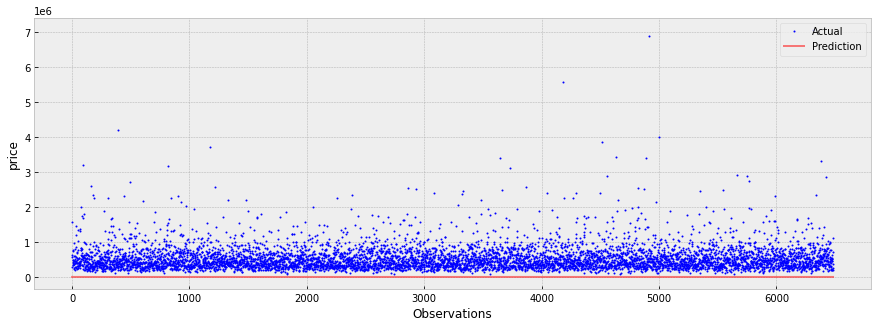

In [234]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test, 'b.', markersize=2, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred, 'r-', label='Prediction', alpha =.5)
plt.xlabel('Observations')
plt.ylabel('price')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

In [235]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1']] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt  intercept  x_coef  cf_lower_bound  cf_upper_bound
0 0.100     -0.566   0.146           0.144           0.148
1 0.200     -0.434   0.164           0.161           0.166
2 0.300     -0.310   0.183           0.180           0.186
3 0.400     -0.196   0.197           0.194           0.201
4 0.500     -0.079   0.217           0.214           0.221
5 0.600      0.037   0.228           0.225           0.232
6 0.700      0.169   0.246           0.241           0.250
7 0.800      0.339   0.268           0.262           0.273
8 0.900      0.646   0.322           0.314           0.330


In [236]:
y_test.size

6484

In [237]:
y_pred.size

6484

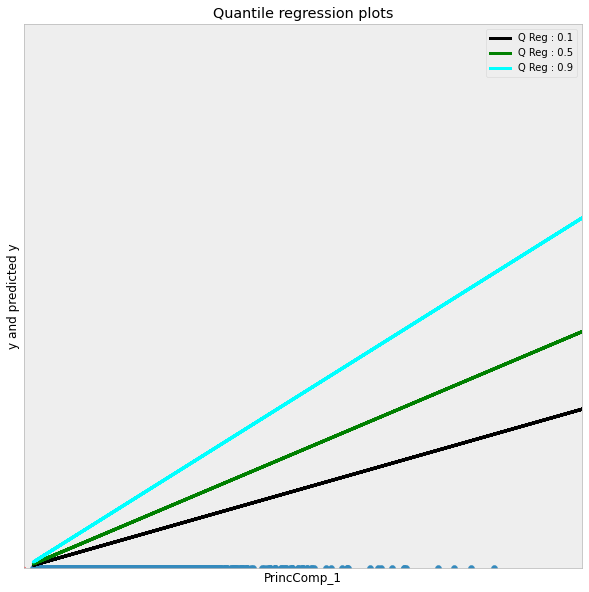

In [238]:
#plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 5000000)
plt.plot(y_pred, y_pred, "r")
y_pred3 = models[0].params['Intercept'] + models[0].params['PrincComp_1'] *y_test
plt.plot(y_test, y_pred3, color='black',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("PrincComp_1")
plt.ylabel("y and predicted y")
plt.title("Quantile regression plots")
plt.legend()

<Figure size 432x288 with 0 Axes>

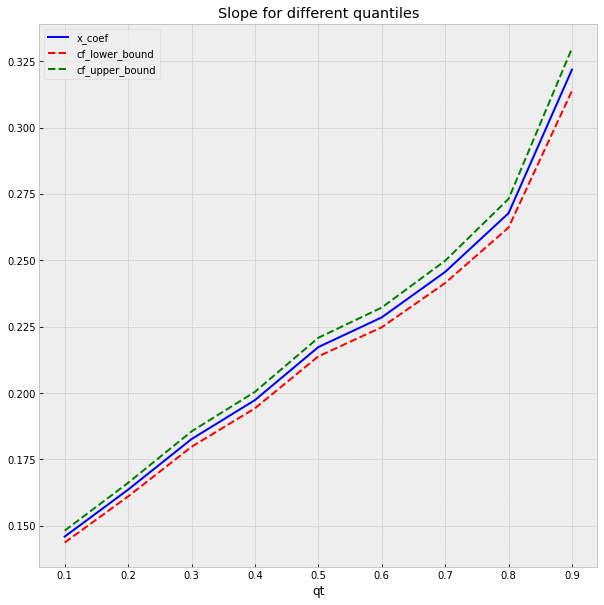

In [69]:
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'],figsize=(10,10))
plt.show()

#**Ridge Regression**

In [70]:
X = df1.drop(['price'],axis=1)
y = df1['price']
X.shape,y.shape

((21613, 19), (21613,))

In [71]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)
print('Variance score: {0:.2f}'.format(regression.score(X_test, y_pred)))
#The output  value of 40504545596.74054 will be the indicator to determine if the regularized ridge regression model is superior or not.

40504545596.74061
Variance score: -130976435285720.72


In [72]:
from sklearn.linear_model import Ridge
# ridge regression model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [73]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41008448117.00635

In [74]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40510876989.49507


In [75]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40894.236379826056,
 'bedrooms': -34567.13653335847,
 'condition': 26663.838987103172,
 'floors': 7378.828793345107,
 'grade': 94325.5206290584,
 'id': -1.2790858251178978e-06,
 'lat': 597878.0011171924,
 'long': -211322.22457339754,
 'sqft_above': 90.94536041498799,
 'sqft_basement': 61.197740562585125,
 'sqft_living': 88.14271777184341,
 'sqft_living15': 24.4237818701924,
 'sqft_lot': 0.12048854005289447,
 'sqft_lot15': -0.3851691525229889,
 'view': 53116.15242866591,
 'waterfront': 578462.8183807622,
 'yr_built': -2560.0728327611714,
 'yr_renovated': 20.751218340124048,
 'zipcode': -560.9083557651256}

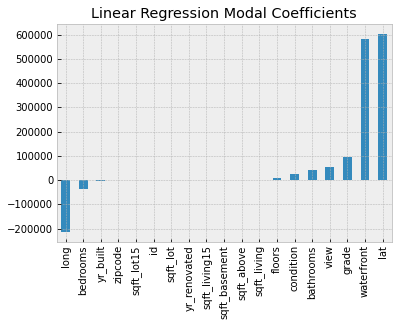

In [76]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
#checking the magnitude of coefficients

predictors = X.columns

linear_coef = Series(coef_dict_baseline).sort_values()

linear_coef.plot(kind='bar', title='Linear Regression Modal Coefficients')

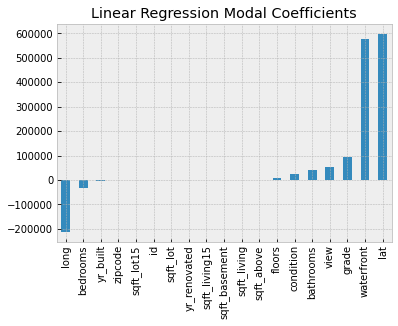

In [77]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline
# This is confirmed with the coefficients of each model found below.
# 
ridge_coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    ridge_coef_dict_baseline[feat] = coef
ridge_coef_dict_baseline

#checking the magnitude of coefficients

predictors = X.columns

linear_coef = Series(ridge_coef_dict_baseline).sort_values()

linear_coef.plot(kind='bar', title='Linear Regression Modal Coefficients')

##**Lasso Regression**

In [80]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#data for model 2
X = df1.drop(['price'],axis=1)
y = df1[['price']]
X.shape,y.shape
# 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998524173262097
lasso MSE: 40504545639.722374
lasso coef: [ -3721.47034223 -33289.34283726  31706.64764677 259463.35492305
   5034.05245945   3655.73809075  50412.29416233  40686.90126547
  17100.95285177 112964.85055691 -83886.21166793 -58549.86597024
 -77085.30364978   7894.77484649 -31158.0401249   83471.60682443
 -29995.45369982  14811.69160008 -10818.04221963]


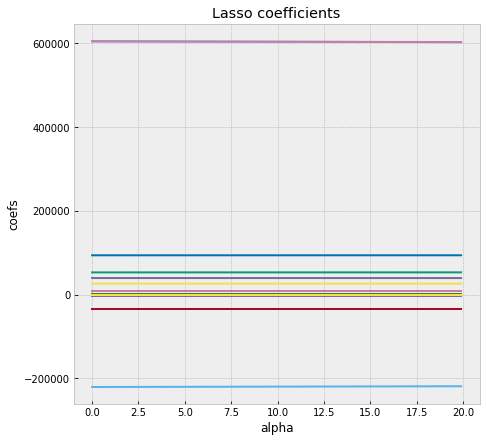

In [81]:
# Importing library for visualization
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

##**ElasticNet Regression**

In [83]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Elastic Net Model

# 
X=df1.drop(['price'],axis=1)
y=df1[['price']]
X.shape,y.shape

((21613, 19), (21613, 1))

In [84]:
# normalize data.  
# create the gridsearch.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [85]:
# fit model 
#display the best parameters and the best results.
# 41050144976.83428()
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41050144976.834274

In [86]:
# Elastic model performance
#79369724903.44846
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

79369724903.44807


In [87]:
#  the coefficients
# {'R&D Spend': 0.7833652863082342,'Administration': -0.01695518117671228,'Marketing Spend': 0.03294491814412594,'State': 37.26905179033893}
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 23092.633684478027,
 'bedrooms': 9155.70685063328,
 'condition': 5767.404300018014,
 'floors': 14348.44365569363,
 'grade': 22211.449136386935,
 'id': -2.817140821626287e-07,
 'lat': 117963.99620560609,
 'long': -19328.92266253145,
 'sqft_above': 26.88111037647479,
 'sqft_basement': 29.91274411705143,
 'sqft_living': 28.798383616239764,
 'sqft_living15': 31.194047363692565,
 'sqft_lot': 0.05852061105940543,
 'sqft_lot15': 0.06271155031177601,
 'view': 21945.409137519477,
 'waterfront': 143887.34516397648,
 'yr_built': -116.40479779912972,
 'yr_renovated': 14.756428305753914,
 'zipcode': -5.782181507028771}